In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
#reading df
path = r"c:\Users\Ahmed\Desktop\Project Mats\Metrics.csv"
df = pd.read_csv(path)
#droping CustomerID column
df = df.drop('CustomerID', axis=1)
#Drop rows where CLV is negative(outliers)
df = df[df['CLV'] >= 0]
#log transformation
df["CLV"] = np.log1p(df["CLV"])
df["TotalSales"] = np.log1p(df["TotalSales"])
df["Frequency"] = np.log1p(df["Frequency"])
df["AverageOrderValue"] = np.log1p(df["AverageOrderValue"])


#slicing df into features X and variables Y
X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

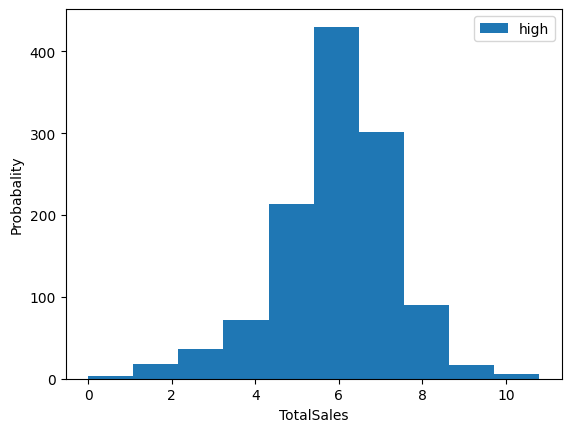

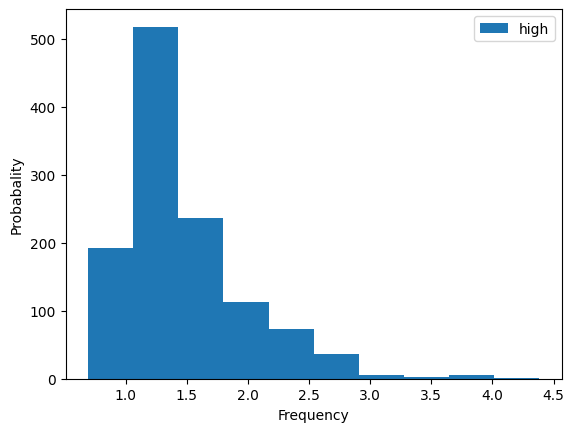

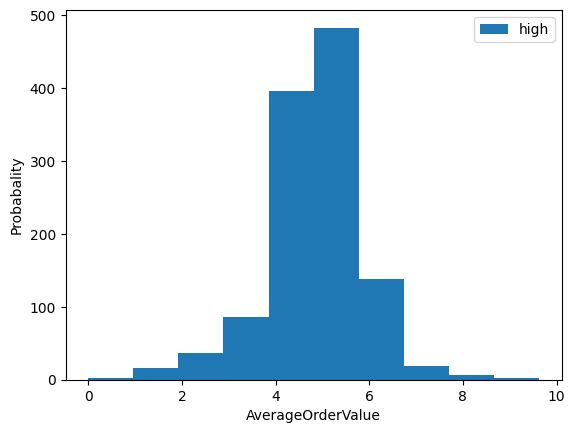

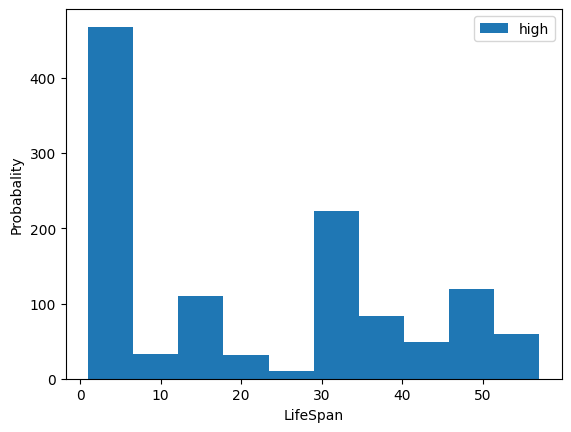

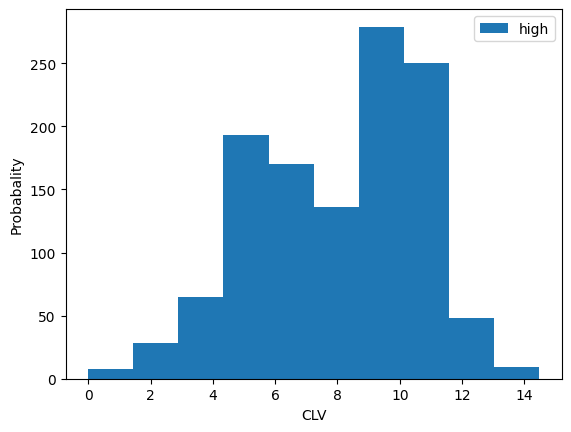

In [3]:

for label in df.columns[0:]:
    plt.hist(df[label],label ='high')
    #plt.hist(df[df["CLV"] < 8][label],label ='low',density=True,alpha=0.7)
    plt.legend()
    plt.ylabel('Probabality')
    plt.xlabel(label)

    plt.show()

In [4]:
#spliting df using train_test_split function  
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
#80f     20f     80v    20v



In [5]:
#defining regression model
rmodel = linear_model.LinearRegression()

In [6]:
#building the training model
rmodel.fit(X_train, Y_train)

LinearRegression()

In [7]:
#using trained model to pridict on X_test
Y_pred = rmodel.predict(X_test)

In [8]:
#printing model perfomance
print("coefficients:",rmodel.coef_)
print("intercept:",rmodel.intercept_)
print("mean sqr error:",mean_squared_error(Y_test,Y_pred))
print("r2score",r2_score(Y_test,Y_pred))

coefficients: [ 3.24035045 -2.93516728 -2.26519431  0.08407452]
intercept: 2.210024645771772
mean sqr error: 0.3432675929271144
r2score 0.9520511001721239
